# **Projeto 2 da disciplina de Ci√™ncia dos Dados - Engenharia Insper**

 **Alunos: Breno Alencar Ara√∫jo, Lorran Caetano Machado Lopes e N√≠vea de Abreu Dantas Lima**

 <img src="ca26ec6b2d480040c28e05c98d53c9b5.jpg" alt="poema sobre felicidade" width="250"/>

https://www.youtube.com/watch?v=e7dS5BUok4c

### Mesmo abstrata e subjetiva, √© poss√≠vel escalar a felicidade de zero a dez. Nosso objetivo √© prever, com base em outro indicadores socioecon√¥micos, as poss√≠veis pontua√ß√µes futuras de felicidade dos pa√≠ses pelo mundo. Qual ser√° o indicador que mais afeta a felicidade das pessoas?

Carregando a biblioteca Pandas:

In [1]:
import pandas as pd

In [2]:
# Carregando mais bibliotecas necess√°rias
#%matplotlib notebook
#%reset -f
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
# Para ter melhor print
from IPython.display import display

Carregando e exibindo a base de dados:

In [3]:
felicidade_2021 = pd.read_csv("world-happiness-report-2021.csv")

In [4]:
felicidade_2021.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

## Verificando colunas

In [5]:
felicidade_2021.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [6]:
felicidade_2021.describe()

Ladder score  Standard error of ladder score  upperwhisker  \
count    149.000000                      149.000000    149.000000   
mean       5.532839                        0.058752      5.648007   
std        1.073924                        0.022001      1.054330   
min        2.523000                        0.026000      2.596000   
25%        4.852000                        0.043000      4.991000   
50%        5.534000                        0.054000      5.625000   
75%        6.255000                        0.070000      6.344000   
max        7.842000                        0.173000      7.904000   

       lowerwhisker  Logged GDP per capita  Social support  \
count    149.000000             149.000000      149.000000   
mean       5.417631               9.432208        0.814745   
std        1.094879               1.158601        0.114889   
min        2.449000               6.635000        0.463000   
25%        4.706000               8.541000        0.750000   
50%        5.413000               9.569000        0.832000   
75%        6.128000              10.421000        0.905000   
max        7.780000              11.647000        0.983000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               149.000000                    149.000000  149.000000   
mean                 64.992799                      0.791597   -0.015134   
std                   6.762043                      0.113332    0.150657   
min                  48.478000                      0.382000   -0.288000   
25%                  59.802000                      0.718000   -0.126000   
50%                  66.603000                      0.804000   -0.036000   
75%                  69.600000                      0.877000    0.079000   
max                  76.953000                      0.970000    0.542000   

       Perceptions of corruption  Ladder score in Dystopia  \
count                 149.000000              1.490000e+02   
mean                    0.727450              2.430000e+00   
std                     0.179226              5.347044e-15   
min                     0.082000              2.430000e+00   
25%                     0.667000              2.430000e+00   
50%                     0.781000              2.430000e+00   
75%                     0.845000              2.430000e+00   
max                     0.939000              2.430000e+00   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        149.000000                    149.000000   
mean                           0.977161                      0.793315   
std                            0.404740                      0.258871   
min                            0.000000                      0.000000   
25%                            0.666000                      0.647000   
50%                            1.025000                      0.832000   
75%                            1.323000                      0.996000   
max                            1.751000                      1.172000   

       Explained by: Healthy life expectancy  \
count                             149.000000   
mean                                0.520161   
std                                 0.213019   
min                                 0.000000   
25%                                 0.357000   
50%                                 0.571000   
75%                                 0.665000   
max                                 0.897000   

       Explained by: Freedom to make life choices  Explained by: Generosity  \
count                                  149.000000                149.000000   
mean                                     0.498711                  0.178047   
std                                      0.137888                  0.098270   
min                                      0.000000                  0.000000   
25%                                      0.409000                  0.105000   
50%              

Todas as colunas est√£o sendo lidas como n√∫meros de ponto flutuante

#### H√° valores nulos?

In [7]:
felicidade_2021.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

As colunas n√£o possuem valores nulos

In [8]:
# Criando uma lista com o nome das colunas, as nossas vari√°veis
colunas = list(felicidade_2021.columns[6:12])
colunas

['Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

# INICIANDO A AN√ÅLISE EXPLORAT√ìRIA

## Criando loop para verificar medidas de associa√ß√£o

In [9]:
# Dicion√°rio para loop de associa√ß√µes
correlacoes = {}
i = 0
for i in range(len(colunas)):
    corr = felicidade_2021["Ladder score"].corr(felicidade_2021[colunas[i]]).round(2)
    cov = felicidade_2021["Ladder score"].cov(felicidade_2021[colunas[i]]).round(2)
    correlacoes[f'Corr Grau de felicidade e {colunas[i]}'] = corr

In [10]:
# Exibindo dataframe criado com associa√ß√µes
pd.DataFrame.from_dict(correlacoes, orient='index').sort_values(0, ascending = False)

0
Corr Grau de felicidade e Logged GDP per capita     0.79
Corr Grau de felicidade e Healthy life expectancy   0.77
Corr Grau de felicidade e Social support            0.76
Corr Grau de felicidade e Freedom to make life ...  0.61
Corr Grau de felicidade e Generosity               -0.02
Corr Grau de felicidade e Perceptions of corrup... -0.42

## Observa√ß√µes iniciais


### Entre os graus de felicidade e liberdade de fazer escolhas h√° quase uma correla√ß√£o moderada (0.60) 
### Percebemos uma fraca correla√ß√£o entre os graus de generosidade e felicidade
### Por meio do c√°lculo da correla√ß√£o, √© poss√≠vel notar que Healthy life expectancy e Social support apresentam uma interdepend√™ncia positiva e forte, acima de (0.7) 
### Percebe-se uma correla√ß√£o negativa moderada entre os graus de corrup√ß√£o e felicidade (-0.42)
### Percebe-se uma correla√ß√£o forte entre os graus de Logged GDP per capita e felicidade (0.78)

# Exibindo gr√°ficos de dispers√£o para visualizar rela√ß√µes 

In [11]:
# Importando mais bibliotecas necess√°rias
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

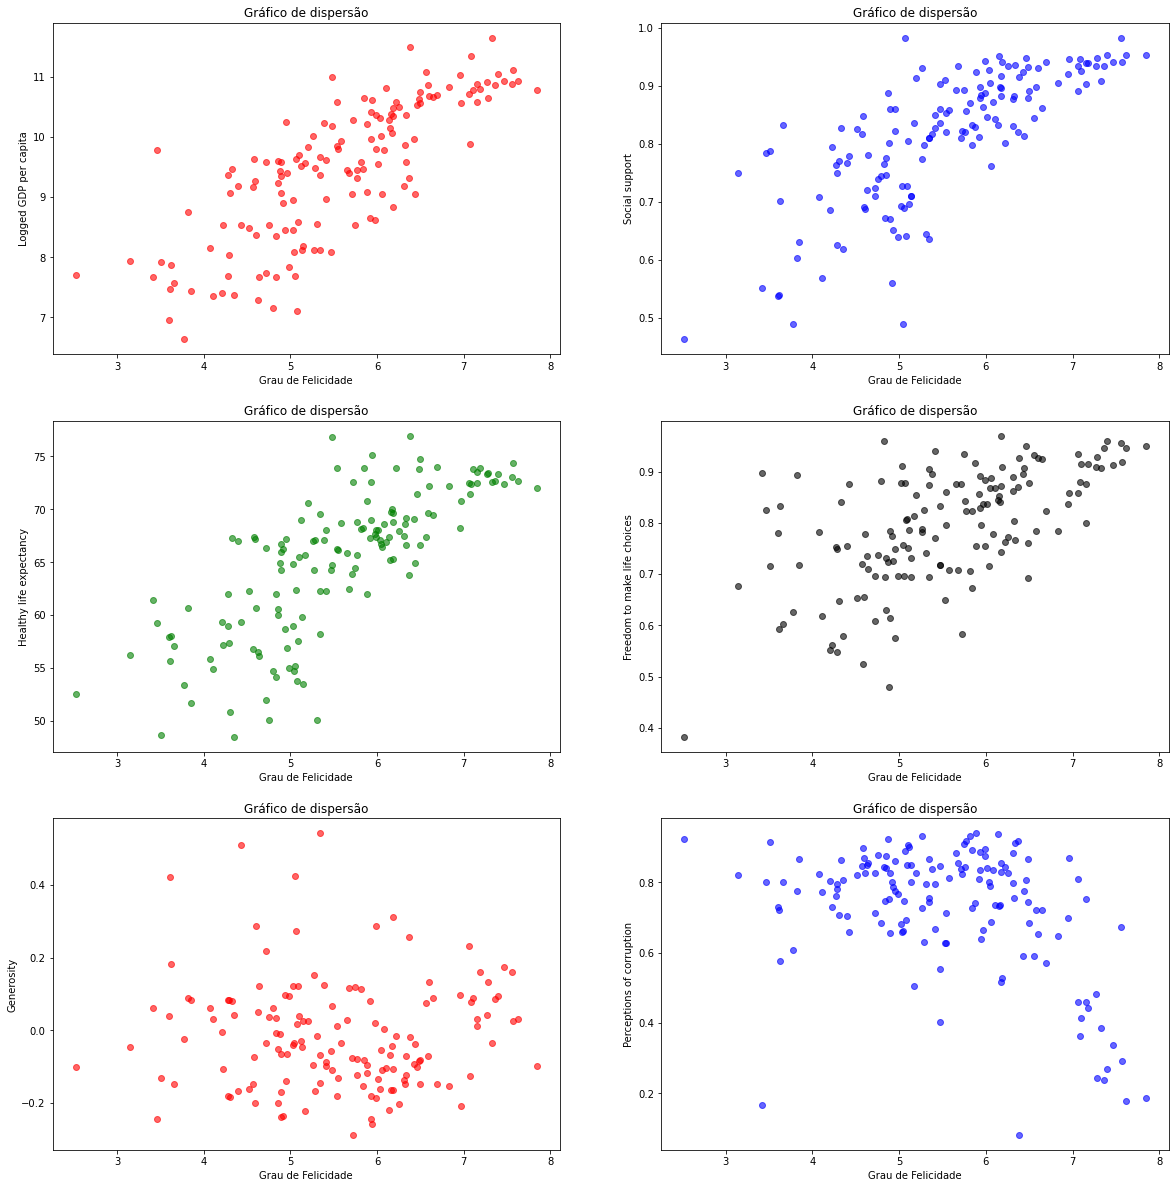

In [12]:
# Exibindo gr√°ficos de compara√ß√£o 

import itertools
fig = plt.figure(figsize=(20, 50))
colors = itertools.cycle(["r", "b", "g", "0"]) 
for i in range(len(colunas)):
    X = felicidade_2021["Ladder score"]
    Y = felicidade_2021[colunas[i]]
    plt.subplot(7, 2, i+1)
    plt.scatter(X,Y, color=next(colors), alpha = 0.6)
    plt.title('Gr√°fico de dispers√£o')
    plt.xlabel("Grau de Felicidade")
    plt.ylabel(f'{felicidade_2021.columns[i+6]}')
plt.show()

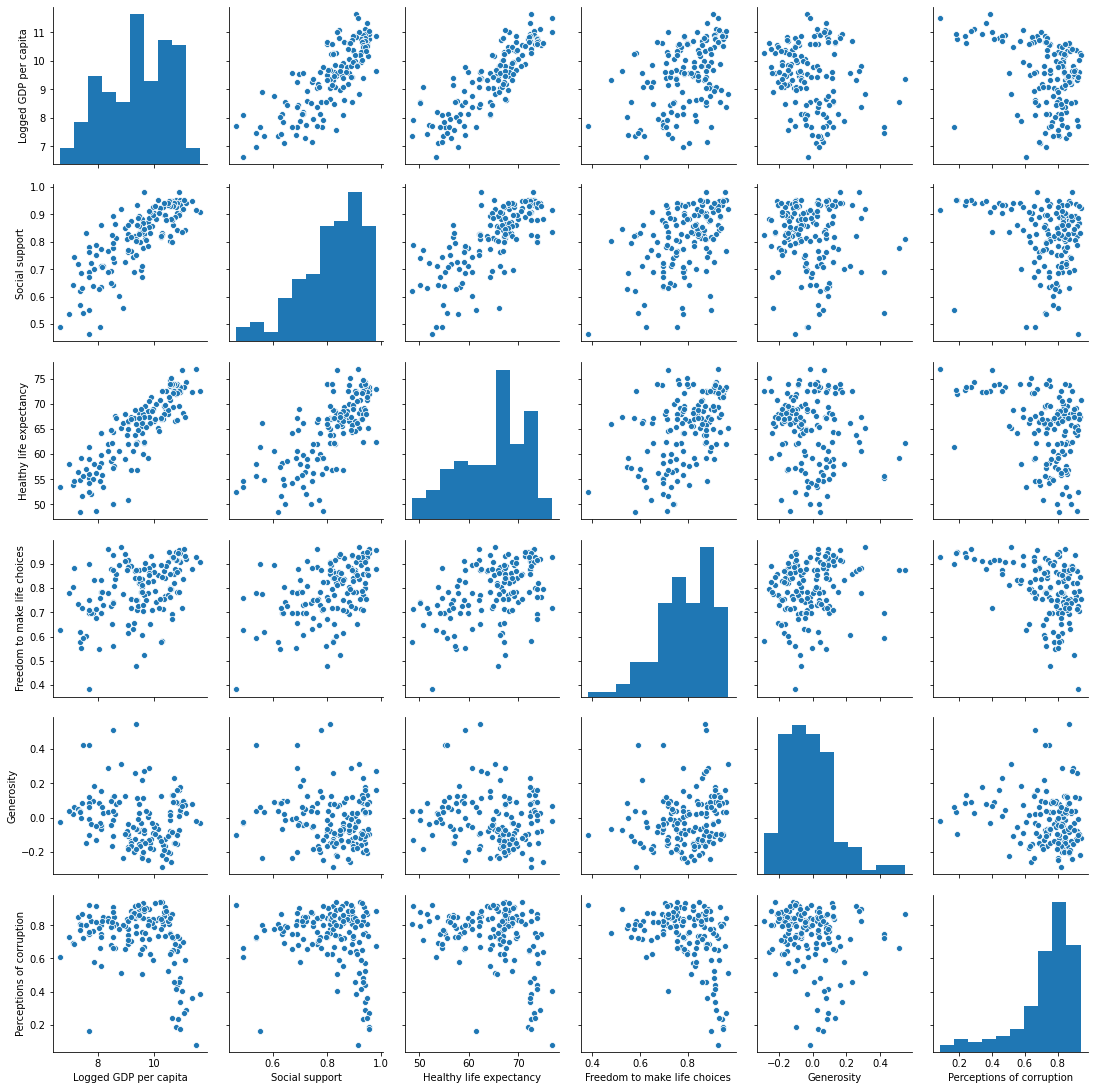

In [11]:
sns.pairplot(felicidade_2021, vars = felicidade_2021.columns[6:12])

### Os gr√°ficos acima corroboram com as medidas de associa√ß√£o calculadas acima, apresentando essas rela√ß√µes de maneira mais intuitiva. 

# Visualizando a correl√ß√£o entre as vari√°veis por meio da Matriz de calor

Nela, percebemos que `Healthy life expectancy` e `Social support` apresentam a mesma tonalidade (uma das mais claras), corroborando com o que vimos acima.

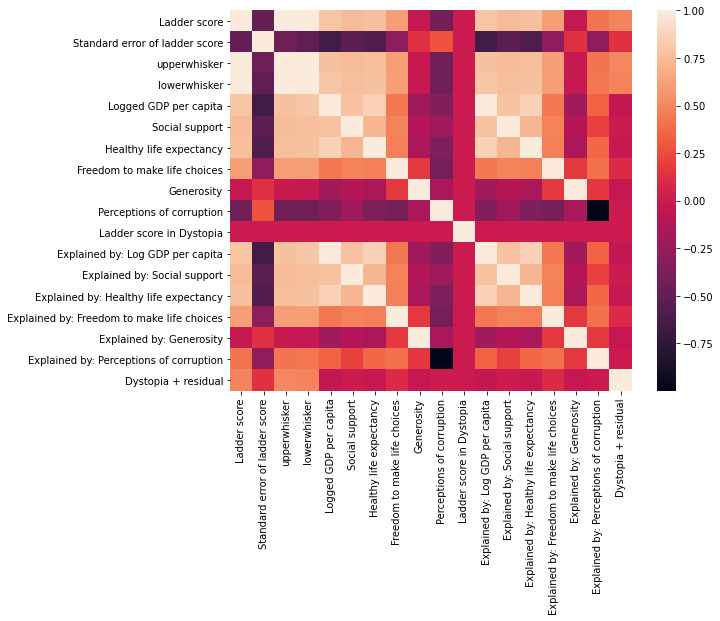

In [13]:
plt.figure(figsize=(9, 7))
sns.heatmap(felicidade_2021.corr());

Iniciamos a an√°lise da matriz percebendo que ela possui uma diagonal que divide simetricamente, ent√£o tomamos a parte inferior para a an√°lise. As partes mais escuras representam as vari√°veis de menor correla√ß√£o e as mais claras de maior correla√ß√£o.

# An√°lise da distribui√ß√£o do grau de felicidade dos pa√≠ses

### Construiremos um histograma do grau de felicidade das popula√ß√µes dos pa√≠ses a fim de verificar o comportamento da distribui√ß√£o.

In [14]:
faixa = np.linspace(0, 10, 40) # criando uma faixa de valores (de 0 a 10 com 40 divis√µes)

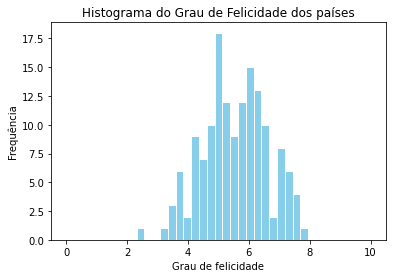

In [15]:
plt.hist(felicidade_2021["Ladder score"], bins=faixa, edgecolor = 'white', color = 'skyblue') #criando uma histograma
plt.title("Histograma do Grau de Felicidade dos pa√≠ses")
plt.xlabel("Grau de felicidade")
plt.ylabel("Frequ√™ncia")
plt.show()

#### Aparentemente, ela assemelha-se a uma distrui√ß√£o normal.  Vamos verificar a ader√™ncia dessa distribui√ß√£o por meio do m√©todo probplot:

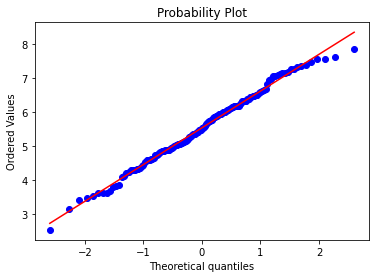

In [16]:
import scipy 
scipy.stats.probplot(felicidade_2021['Ladder score'], dist='norm', plot=plt); 

### Por meio desse gr√°fico, percebe-se que o grau de felicidade segue, com boa aproxima√ß√£o, uma distribui√ß√£o normal!

#### Com base nisso, utilizaremos m√©todos para tentar prever valores da nossa vari√°vel dependente, ou seja, do Grau de Felicidade.

In [17]:
SEED = 42 
from sklearn import model_selection
X = felicidade_2021[colunas] # explicativas
y = np.array(felicidade_2021['Ladder score'].to_list()) #resposta

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=SEED)

# Regress√£o Linear M√∫ltipla

Um poss√≠vel caminho para a predi√ß√£o de valores √© utilizar a `Regress√£o Linear M√∫ltipla`. Nela, aproximaremos os resultados dispersos a uma reta.

## Passo 1: Ajustando o modelo
Ajustaremos o modelo considerando `Grau de Felicidade` como resposta (dependente) e as demais vari√°veis da base de dados como explicativas!

Agora faremos uso da fun√ß√£o [`regress`](#regress) para fazer o ajuste:

In [19]:
### Fun√ß√£o utilit√°ria para fazer a regress√£o com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como vari√°vel resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como vari√°vel(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [20]:
results = regress(y_train,X_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     69.01
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           2.47e-35
Time:                        14:21:20   Log-Likelihood:                -86.365
No. Observations:                 119   AIC:                             186.7
Df Residuals:                     112   BIC:                             206.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.2577      0.667     -3.386      0.001      -3.579      -0.937
Logged GDP per capita            0.2680      0.090      2.984      0.003       0.090       0.446
Social support                   2.5960      0.701      3.703      0.000       1.207       3.985
Healthy life expectancy          0.0372      0.014      2.620      0.010       0.009       0.065
Freedom to make life choices     1.6581      0.524      3.165      0.002       0.620       2.696
Generosity                       0.4156      0.335      1.241      0.217      -0.248       1.079
Perceptions of corruption       -0.7725      0.304     -2.543      0.012      -1.374      -0.171
==============================================================================
Omnibus:                       15.155   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.930
Skew:                          -0.717   Prob(JB):                     7.75e-05
Kurtosis:                       4.327   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Explicando as sa√≠das do .summary() ##
const ‚ûî estimativa do intercepto ùõΩ·àò 0
‚ûî estimativa da inclina√ß√£o da reta ùõΩ·àò 1


#### Teste t valor p ####
Coluna mostra o valor-p do Teste t que possui $ùêª_0$: ùõΩùëñ = 0 Regra geral‚ûî se valor-p < ùõº, ent√£o rejeitase a hip√≥tese nula. Se teste for para ùõΩ1, mostra que a vari√°vel explicativa √© relevante para explicar mudan√ßas na vari√°vel resposta.

#### Teste Omnibus ####
Testa normalidadedos res√≠duos

#### Prob(Omnibus) ####
√â o valor-p desse teste de normalidade.
    
Regra geral‚ûî - (IDEAL) Prob(Omnibus) - Se Prob(Omnibus) for muito baixo (menor do que ùõº), ent√£o existe evid√™ncia de que os res√≠duos n√£o s√£o distribu√≠dos normalmente, violando nesse caso essa suposi√ß√£o do modelo de regress√£o.

#### Prob(JB)  ####
(IDEAL) Prob(JB) > ùõº
Se Prob(JB) for muito baixo (menor do que < $\alpha$), ent√£o existe evid√™ncia de que os res√≠duos n√£o s√£o distribu√≠dos normalmente,violando 
nesse caso essa suposi√ß√£o do 
modelo de regress√£o

#### Durbin-Watson:  ####
Testa a autocorrela√ß√£o dos res√≠duos. Uma das suposi√ß√µes √© que os res√≠duos s√£o independentes entre si. Esse valor varia na faixa  [0,4] :

Um valor pr√≥ximo de  2  sugere que n√£o h√° autocorrela√ß√£o dos res√≠duos
Um valor menor que  2  sugere correla√ß√£o positiva dos res√≠duos
Um valor maior que  2  sugere correla√ß√£o negativa dos res√≠duos
O ideal √© que o valor de Durbin-Watson seja pr√≥ximo de 2.

- Prob(Omnibus) √© < que o $\alpha$ adotado, de 10%, ent√£o existe evid√™ncia de que os res√≠duos n√£o s√£o distribu√≠dos normalmente.


- Prob(JB) < $\alpha$, ent√£o existe evid√™ncia de que os res√≠duos n√£o s√£o distribu√≠dos normalmente, violando nesse caso essa suposi√ß√£o do modelo de regress√£o.


Em cada passo para remo√ß√£o de uma vari√°vel √© necess√°rio avaliar a validade das suposi√ß√µes do modelo. Como valor de Durbin-Watson esta entre 1.5 e 2.5, indicativo de normalidade.

## Passo 2: Verificando os resultados dos testes de hip√≥tese
A coluna  $P > |t|$  vinda do comando `results.summary()` refere-se ao valor p de cada vari√°vel explicativa utilizada para ajudar na compreens√£o do comportamento da vari√°vel dependente `Ladder score`.

No caso da regress√£o m√∫ltipla obtida, com exce√ß√£o de `Generosity`, todas se mostram relevantes para explicar a vari√°vel `Ladder score` pois possuem valor p menor do que 10% (maior n√≠vel de signific√¢ncia usualmente adotado). Entretanto, como h√° muitas vari√°veis explicativas, o correto √© utilizar algum m√©todo de sele√ß√£o de vari√°veis.

## Passo 3: Encontrando as melhores vari√°veis
Para encontrar as melhores vari√°veis que explicam a vari√°vel `Ladder score`, aplicaremos o m√©todo `Backward Stepwise`. Esse m√©todo consiste em come√ßar utilizando todas as vari√°veis dispon√≠veis na regress√£o e remover as menos √∫teis para a explica√ß√£o, uma a uma, at√© sobrarem apenas duas. Usando `results.summary()` acima, iremos remover a vari√°vel com maior valor-p desde que n√£o significante, ou seja, desde que seja maior do que o n√≠vel de signific√¢ncia (nesse caso, de 10%)!

Em cada passo para remo√ß√£o de uma vari√°vel √© necess√°rio avaliar a validade das suposi√ß√µes do modelo.

### Passo 3.1: validade das suposi√ß√µes

Como o valor de **Durbin-Watson** est√° entre **1.5** e **2.5**, temos um indicativo de normalidade.

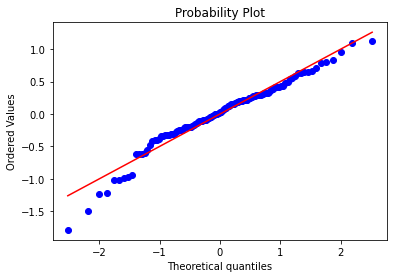

In [21]:
y_predito = results.predict(sm.add_constant(X_train))
residuos = y_train - y_predito 

# Gr√°fico para concluir suspeita
plt.figure(figsize=(6,4))
scipy.stats.probplot(residuos, dist='norm', plot=plt);

Os res√≠duos seguem aproximadamente uma distribui√ß√£o normal.

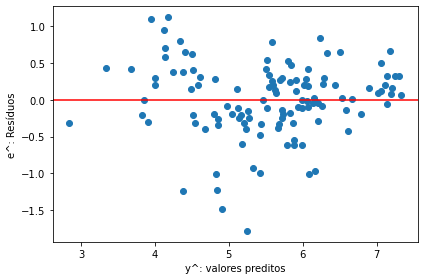

In [22]:
# Calcula os valores preditos a partir dos valores preditos e de X

fig = plt.figure(figsize=(6, 4))
plt.scatter(y_predito, results.resid); 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('e^: Res√≠duos')
plt.xlabel('y^: valores preditos')
plt.tight_layout()
plt.show()

H√° uma n√£o linearidade nos res√≠duos, como podemos ver no gr√°fico acima. 

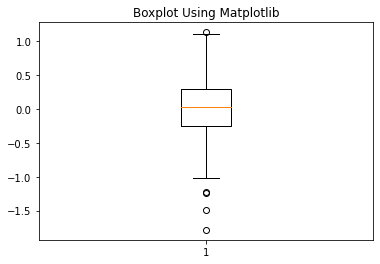

In [23]:
plt.figure(figsize=(6, 4))
plt.boxplot(results.resid)
plt.title("Boxplot Using Matplotlib")
plt.show()

<img src="boxplot.png" alt="Explicando o boxplot" width="500"/>

Por meio do gr√°fico acima, notamos a presen√ßa de 4 outliers.

Prosseguindo para a remo√ß√£o: no caso, ver√° que ser√° removida a vari√°vel Generosity. Faremos um novo ajuste de regress√£o sem essa vari√°vel!

In [24]:
X_train2 = X_train[['Logged GDP per capita','Social support','Healthy life expectancy',
                     'Freedom to make life choices','Perceptions of corruption']]

In [25]:
results2 = regress(y_train, X_train2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.11
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           5.51e-36
Time:                        14:21:21   Log-Likelihood:                -87.177
No. Observations:                 119   AIC:                             186.4
Df Residuals:                     113   BIC:                             203.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.1286      0.660     -3.224      0.002      -3.437      -0.821
Logged GDP per capita            0.2448      0.088      2.780      0.006       0.070       0.419
Social support                   2.6820      0.699      3.835      0.000       1.296       4.067
Healthy life expectancy          0.0358      0.014      2.523      0.013       0.008       0.064
Freedom to make life choices     1.8409      0.504      3.653      0.000       0.843       2.839
Perceptions of corruption       -0.8252      0.301     -2.737      0.007      -1.423      -0.228
==============================================================================
Omnibus:                       17.232   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.959
Skew:                          -0.769   Prob(JB):                     1.03e-05
Kurtosis:                       4.506   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Em cada passo para remo√ß√£o de uma vari√°vel √© necess√°rio avaliar a validade das suposi√ß√µes do modelo. Como valor de Durbin-Watson esta entre 1.5 e 2.5, indicativo de normalidade.

Perceba que a nova sa√≠da de `.summary()` possui valores diferentes, decorrente da remo√ß√£o da coluna `Generosity`. 

As vari√°veis 'Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption' est√£o dentro da signific√¢ncia adotada.

Novamente, faremos uma an√°lise dos res√≠duos:

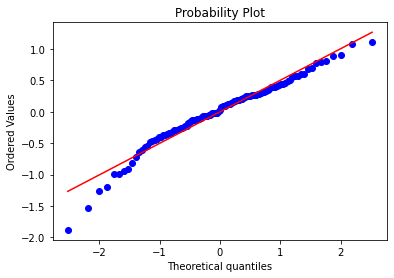

In [48]:
y2_predito = results2.predict(sm.add_constant(X_train2))
residuos2 = y_train - y2_predito 

# Gr√°fico para concluir suspeita
plt.figure(figsize=(6,4))
scipy.stats.probplot(residuos2, dist='norm', plot=plt);

Os res√≠duos seguem aproximadamente uma distribui√ß√£o normal, distando-se um pouco apenas nas caudas.

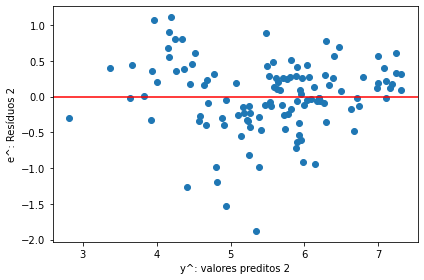

In [27]:
# Calcula os valores preditos a partir dos valores preditos e de X

fig = plt.figure(figsize=(6, 4))
plt.scatter(y2_predito, results2.resid); 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('e^: Res√≠duos 2')
plt.xlabel('y^: valores preditos 2')
plt.tight_layout()
plt.show()

H√° uma n√£o linearidade nos res√≠duos, como podemos ver no gr√°fico acima. 

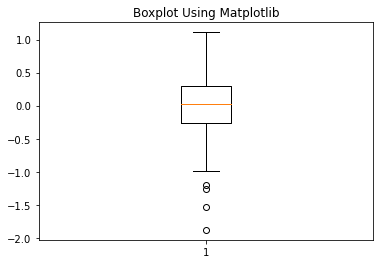

In [28]:
plt.figure(figsize=(6, 4))
plt.boxplot(results2.resid)
plt.title("Boxplot Using Matplotlib")
plt.show()

Por meio do gr√°fico acima, notamos a presen√ßa de 4 outliers.

# Fazendo com a base de teste para compara√ß√£o

In [29]:
resultsT = regress(y_test, X_test)
resultsT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     7.504
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           0.000154
Time:                        14:22:02   Log-Likelihood:                -26.773
No. Observations:                  30   AIC:                             67.55
Df Residuals:                      23   BIC:                             77.35
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.3830      1.968     -1.211      0.238      -6.454       1.688
Logged GDP per capita            0.4110      0.302      1.360      0.187      -0.214       1.036
Social support                   0.6491      2.249      0.289      0.775      -4.003       5.301
Healthy life expectancy          0.0093      0.042      0.220      0.828      -0.079       0.097
Freedom to make life choices     3.6843      1.627      2.265      0.033       0.319       7.049
Generosity                       0.4850      1.211      0.400      0.692      -2.020       2.990
Perceptions of corruption       -0.0454      0.935     -0.049      0.962      -1.979       1.889
==============================================================================
Omnibus:                        1.650   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.490
Skew:                          -0.434   Prob(JB):                        0.475
Kurtosis:                       2.337   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Explicando as sa√≠das do .summary() ##
- Prob(Omnibus) √© > que o $\alpha$ adotado, de 10%, ent√£o existe evid√™ncia de que os res√≠duos s√£o distribu√≠dos normalmente.


- Prob(JB) > $\alpha$, ent√£o existe evid√™ncia de que os res√≠duos s√£o distribu√≠dos normalmente, n√£o violando nesse caso essa suposi√ß√£o do modelo de regress√£o.


Em cada passo para remo√ß√£o de uma vari√°vel √© necess√°rio avaliar a validade das suposi√ß√µes do modelo. Como valor de Durbin-Watson esta entre 1.5 e 2.5, indicativo de normalidade.

## Passo 2: Verificando os resultados dos testes de hip√≥tese
A coluna  $P > |t|$  vinda do comando `results.summary()` refere-se ao valor p de cada vari√°vel explicativa utilizada para ajudar na compreens√£o do comportamento da vari√°vel dependente `Ladder score`.

No caso da regress√£o m√∫ltipla obtida, com exce√ß√£o de `Freedom to make life choices`, todas n√£o se mostram relevantes para explicar a vari√°vel `Ladder score` pois possuem valor p maior do que 10% (maior n√≠vel de signific√¢ncia usualmente adotado). Entretanto, como h√° muitas vari√°veis explicativas, o correto √© utilizar algum m√©todo de sele√ß√£o de vari√°veis.

## Passo 3: Encontrando as melhores vari√°veis
Para encontrar as melhores vari√°veis que explicam a vari√°vel `Ladder score`, aplicaremos o m√©todo `Backward Stepwise`. Esse m√©todo consiste em come√ßar utilizando todas as vari√°veis dispon√≠veis na regress√£o e remover as menos √∫teis para a explica√ß√£o, uma a uma, at√© sobrarem apenas duas. Usando `results.summary()` acima, iremos remover a vari√°vel com maior valor-p desde que n√£o significante, ou seja, desde que seja maior do que o n√≠vel de signific√¢ncia (nesse caso, de 10%)!
Em cada passo para remo√ß√£o de uma vari√°vel √© necess√°rio avaliar a validade das suposi√ß√µes do modelo.

### Passo 3.1: validade das suposi√ß√µes

Como o valor de **Durbin-Watson** est√° entre **1.5** e **2.5**, temos um indicativo de normalidade.

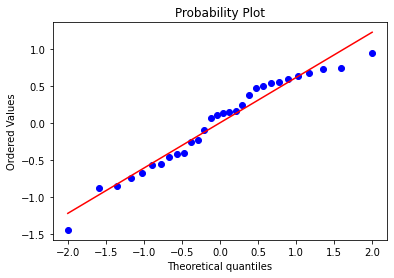

In [49]:
y_predito = resultsT.predict(sm.add_constant(X_test))
residuosT = y_test - y_predito 

# Gr√°fico para concluir suspeita
plt.figure(figsize=(6,4))
scipy.stats.probplot(residuosT, dist='norm', plot=plt);

Prosseguindo para a remo√ß√£o: no caso, ver√° que ser√° removida a vari√°vel "Perceptions of corruption". Faremos um novo ajuste de regress√£o sem essa vari√°vel!

In [31]:
X_test2 = X_test[['Logged GDP per capita','Social support','Healthy life expectancy','Generosity',
                     'Freedom to make life choices']]
results2 = regress(y_train, X_train2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.11
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           5.51e-36
Time:                        14:22:09   Log-Likelihood:                -87.177
No. Observations:                 119   AIC:                             186.4
Df Residuals:                     113   BIC:                             203.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.1286      0.660     -3.224      0.002      -3.437      -0.821
Logged GDP per capita            0.2448      0.088      2.780      0.006       0.070       0.419
Social support                   2.6820      0.699      3.835      0.000       1.296       4.067
Healthy life expectancy          0.0358      0.014      2.523      0.013       0.008       0.064
Freedom to make life choices     1.8409      0.504      3.653      0.000       0.843       2.839
Perceptions of corruption       -0.8252      0.301     -2.737      0.007      -1.423      -0.228
==============================================================================
Omnibus:                       17.232   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.959
Skew:                          -0.769   Prob(JB):                     1.03e-05
Kurtosis:                       4.506   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como o valor de **Durbin-Watson** est√° entre **1.5** e **2.5**, temos um indicativo de normalidade.

As vari√°veis 'Logged GDP per capita','Social support','Healthy life expectancy','Generosity','Freedom to make life choices' est√£o de acordo com o grau de signific√¢ncia adotado (10%).

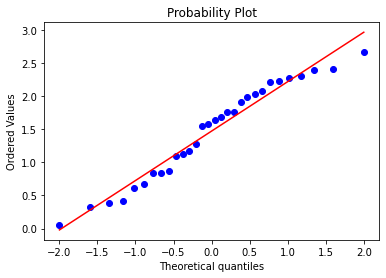

In [50]:
y_predito2 = results2.predict(sm.add_constant(X_test2))
residuosT2 = y_test - y_predito2 

# Gr√°fico para concluir suspeita
plt.figure(figsize=(6,4))
scipy.stats.probplot(residuosT2, dist='norm', plot=plt);

# Random Forest Regression

Em portugu√™s, Random Forest significa floresta aleat√≥ria. Este nome explica muito bem o funcionamento do algoritmo, que ir√° criar muitas √°rvores de decis√£o, de maneira aleat√≥ria, formando o que podemos enxergar como uma floresta, onde cada √°rvore ser√° utilizada na escolha do resultado final. As √Årvores de Decis√£o, ou Decision Trees, estabelecem regras para tomada de decis√£o. O algoritmo criar√° uma estrutura similar a um fluxograma, com ‚Äún√≥s‚Äù onde uma condi√ß√£o √© verificada, e se atendida o fluxo segue por um ramo, caso contr√°rio, por outro, sempre levando ao pr√≥ximo n√≥, at√© a finaliza√ß√£o da √°rvore. 

<img src ="https://didatica.tech/wp-content/uploads/2019/11/RandomForest-1024x505.jpg" alt = "floresta" width="400"/>

### Passo a passo da utiliza√ß√£o

Instala√ß√£o da biblioteca sklearn via pip:

In [33]:
!pip install -U scikit-learn 

Requirement already up-to-date: scikit-learn in c:\users\nivea\anaconda3\lib\site-packages (0.24.2)


Importando o modelo RandomForestRegressor e metrics:

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
random_forest = RandomForestRegressor()

In [35]:
colunas = list(felicidade_2021.columns[6:12])

Executando o m√©todo de ajuste no conjunto de treinamento e o m√©todo de previs√£o no conjunto de teste:

In [36]:
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test) 

Utilizando MAE (Mean absolute error regression loss) e MSE (Mean squared error regression loss) para avaliar o desempenho do modelo. Quanto menor for o seu erro, melhor; e o erro do modelo perfeito ser√° igual a zero.

In [37]:
random_forest = RandomForestRegressor(random_state = SEED)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred)) 

MAE:  0.49615066666666674
MSE:  0.3721006646399998


Esses erros est√£o consideravelmente altos, como observado acima.

No sklearn, para usar a t√©cnica de valida√ß√£o cruzada, podemos fazer isso facilmente usando um par√¢metro oob_score = True. Se definido como True, este par√¢metro faz com que o Random Forest Regressor use amostras ‚Äúout-of-bag‚Äù para estimar o R ^ 2 em dados n√£o vistos. Se obtivermos um valor de mais de 0.75, significa que o modelo n√£o superajustou (a melhor pontua√ß√£o poss√≠vel √© igual a 1)

In [38]:
random_forest_out_of_bag = RandomForestRegressor(oob_score=True)
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_) 

0.7728091594396267


Como o valor est√° cima de 0.75, o modelo n√£o superajustou.

Na figura abaixo, os valores reais s√£o plotados em vermelho e os previstos s√£o plotados em verde. Essa visualiza√ß√£o ajuda a verificar o resultado do modelo.

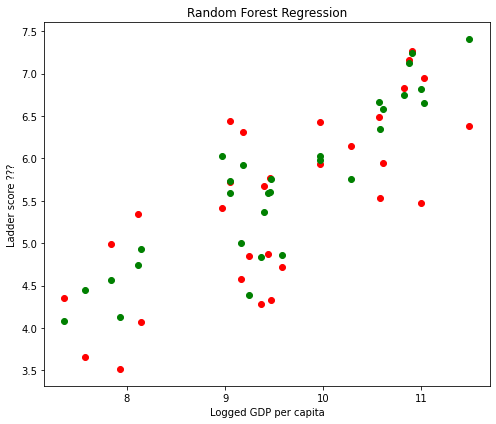

In [39]:
plt.figure(figsize=(7,6))
plt.scatter(X_test['Logged GDP per capita'].values, y_test, color = 'red')
plt.scatter(X_test['Logged GDP per capita'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Logged GDP per capita')
plt.ylabel('Ladder score ???')
plt.tight_layout()
plt.show()

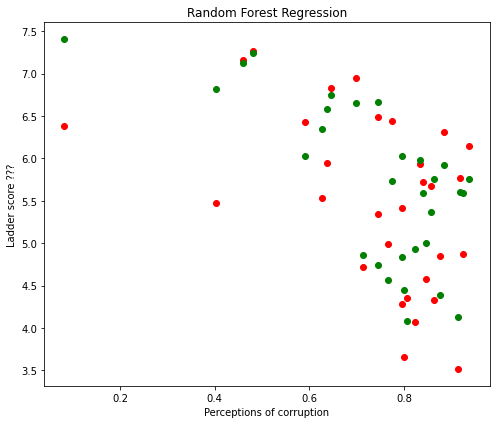

In [40]:
plt.figure(figsize=(7,6))
plt.scatter(X_test['Perceptions of corruption'].values, y_test, color = 'red')
plt.scatter(X_test['Perceptions of corruption'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Ladder score ???')
plt.tight_layout()
plt.show()

Plotando a √°rvore:

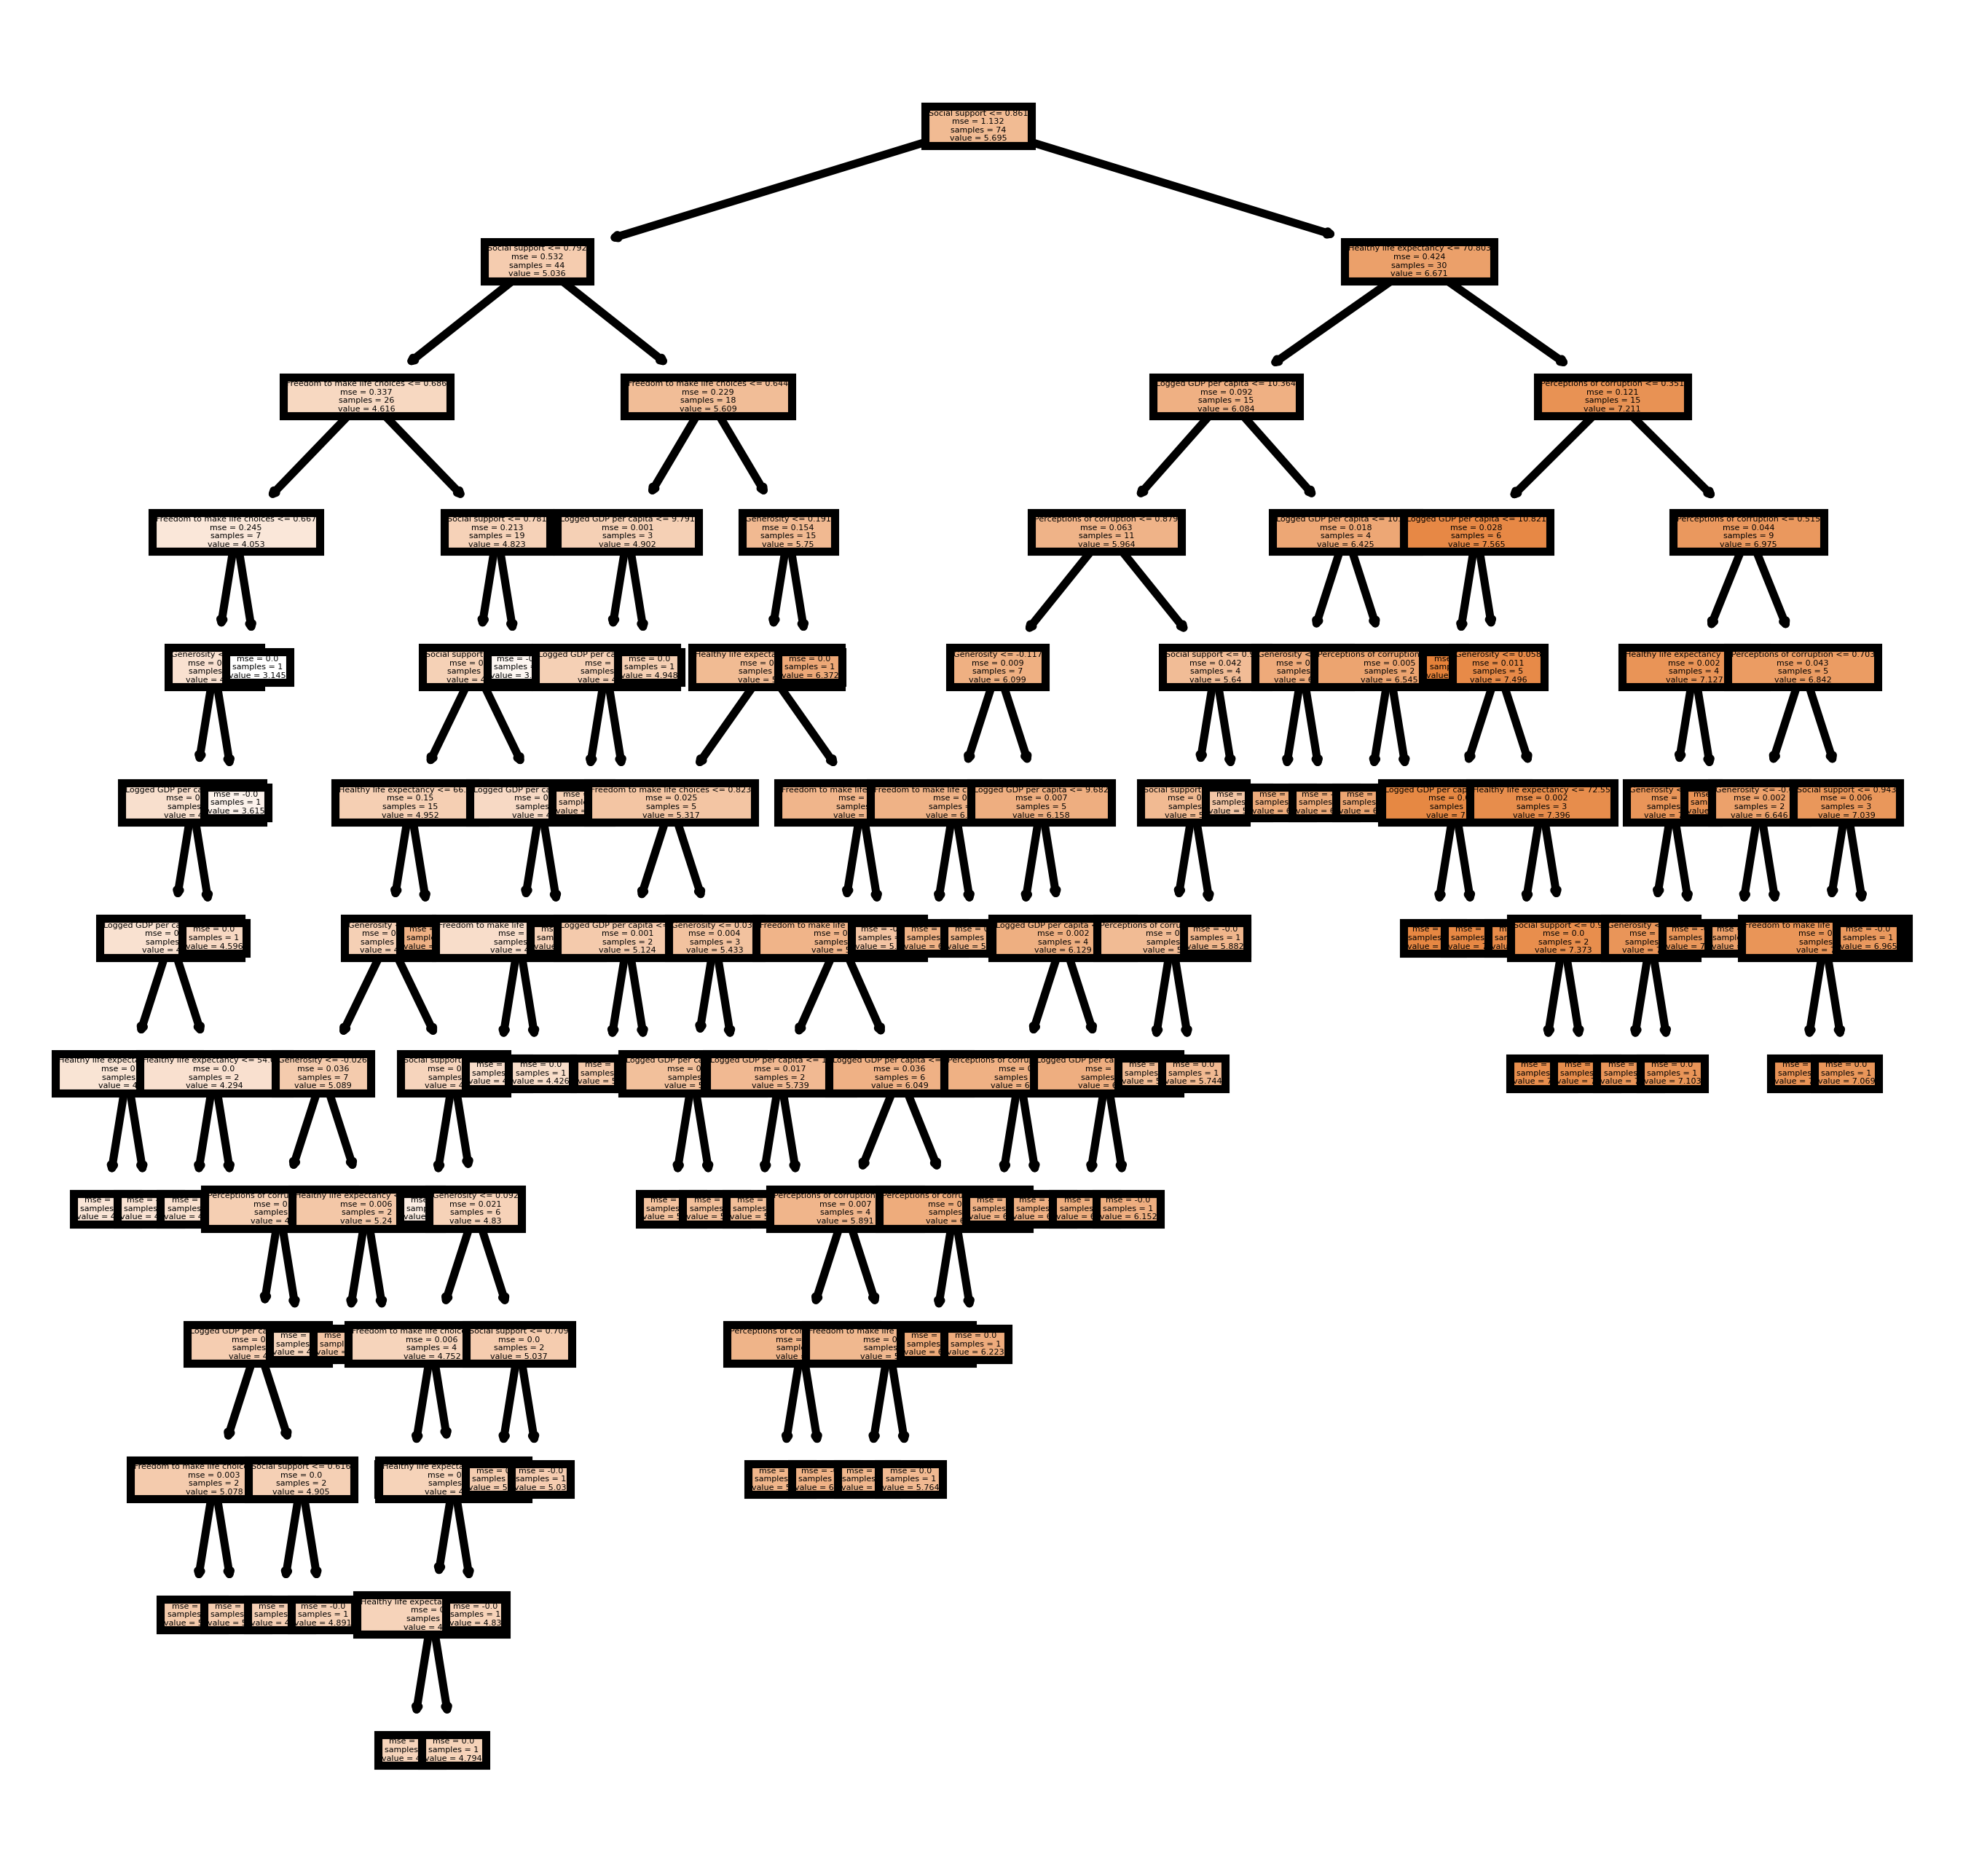

In [41]:
from sklearn import tree
fn=colunas
cn= ["Ladder score"]
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi=800)
tree.plot_tree(random_forest.estimators_[0],
              feature_names = fn,
              class_names=cn,
              filled = True);

# Regress√£o Bayesiana

A regress√£o bayesiana pode ser implementada usando par√¢metros de regulariza√ß√£o na estimativa. O estimador BayesianRidge aplica a regress√£o de Ridge e seus coeficientes para descobrir uma estimativa a posteriori sob a distribui√ß√£o.

In [51]:
#Importando bibliotecas necess√°rias
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Definindo modelo e ajustando os par√¢metros com os dados que possuimos

In [52]:
felicidade_2021 = pd.read_csv("world-happiness-report-2021.csv")
colunas = list(felicidade_2021.columns[6:12])
X = felicidade_2021[colunas] # explicativas
y = np.array(felicidade_2021['Ladder score'].to_list()) #resposta
SEED = 42
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=SEED)

In [53]:
reg = BayesianRidge()
reg.fit(X_train, y_train)

BayesianRidge()

Verificando pontua√ß√£o do modelo

In [54]:
score=reg.score(X_train, y_train)
print("Pontua√ß√£o do modelo (R^2): %.3f" % score)

Pontua√ß√£o do modelo (R^2): 0.785


In [55]:
ypred = reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)

print("RMSE: %.2f" % (mse)**0.5)
print("MSE (Erro Quadr√°tico M√©dio): %.2f" % mse)

RMSE: 0.65
MSE (Erro Quadr√°tico M√©dio): 0.42


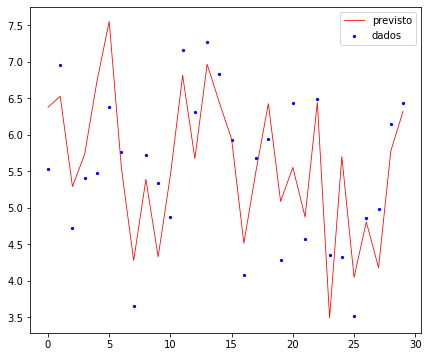

In [56]:
#Plotando gr√°fico
plt.figure(figsize=(7,6))
x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, s=5, color="blue", label="dados")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="previsto")
plt.legend()
plt.show() 

Ao final de nossas predi√ß√µes percebemos que a maior influ√™ncia **est√° na renda m√©dia per capta**.

# Comparando os modelos

Ao fim de nossa an√°lise, ranqueamos, por meio do coeficiente R¬≤, os m√©todos de predi√ß√£o mais ajustados: 0.772 para Random Forest, 0.784 para a regress√£o linear e 0.785 para a regress√£o bayesiana.
Portanto, o melhor desempenho apresentado foi obtido utilizando a regress√£o bayesiana.

# Afinal, dinheiro traz felicidade?
 
 Segundo Elizabeth Dunn, professora da University of British Columbia, no Canad√°, Ph.D em Psicologia e autora do livro Dinheiro feliz ‚Äì a arte de gastar com intelig√™ncia, **dinheiro traz felicidade at√© um certo ponto**. Para embasar sua afirma√ß√£o, ela trouxe um estudo do te√≥rico de finan√ßa comportamental Angus Deaton, um economista da universidade de Princeton (EUA). Ele estimou que acima de um sal√°rio anual m√©dio o impacto sobre a felicidade no dia a dia √© bem reduzido. A justificativa vem de que a grande parte das pessoas ricas possuem sua fortuna atrelada a longas jornadas de trabalho, o que causa mais tens√£o e estresse do que o prazer proporcionado "pelo que o dinheiro pode comprar".
 

Ele ressalta que um pensamento comum √© que, ao enriquecer, as pessoas acreditem que ter√£o mais tempo para atividades n√£o relacionadas ao trabalho, no entanto, na maior parte dos casos, a riqueza est√° ligada √† uma vida focada no trabalho.


Por fim, ele tamb√©m conta que ainda h√° um efeito de quando se possui muito dinheiro. Trata-se ef√™mera felicidade em se ter um bem de valor devido a banalidade e normalidade de se obter.

Saindo de casos espec√≠ficos e partindo para uma realidade mais abrangente que o indicador de renda per capita representa para um pa√≠s, podemos ressaltar que maior renda proporciona, em primeira an√°lise, maiores √≠ndices de outros indicadores que n√£o por coincid√™ncia se apresentaram mais correlacionados com a felicidade em nossas an√°lises (como expectativa de vida, suporte social ou liberdade de fazer escolhas, por exemplo), bastar ver nossa matriz de calor. 


## Fontes:

https://www.statology.org/durbin-watson-test-python

https://cnvrg.io/random-forest-regression/?gclid=EAIaIQobChMIkrG34Nf08AIVjgyRCh1CoQAmEAAYASAAEgK8RvD_BwE

https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

https://site.guiainvest.com.br/dinheiro-traz-felicidade-a-ciencia-explica/

https://spia.princeton.edu/sites/default/files/content/docs/news/Happiness_Money_Summary.pdf